In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv(r'C:\Users\m_joekid\Desktop\Movie Success\df_copy.csv') # df_copy is a dataset export from my preprocesing sda

In [5]:
del(df['Unnamed: 0'])  

In [6]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [7]:
df_clust=df[['budget','popularity','revenue','runtime','vote_average','vote_count','release_quarter']]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
clust_trans_scaled=scaler.fit_transform(df_clust)

## PCA TRANSFORMATION

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA()

In [12]:
pca.fit(clust_trans_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.explained_variance_ratio_

array([0.44692769, 0.18390529, 0.13511176, 0.11189575, 0.06048544,
       0.03667937, 0.02499471])

### the curve below simply gives a boundary of the explained variance and the possible reduced columns
* 2 components explain about 60% of the data
* 4 components explain about 80% of the data

Text(0.5, 1.0, 'Explained Variance by components')

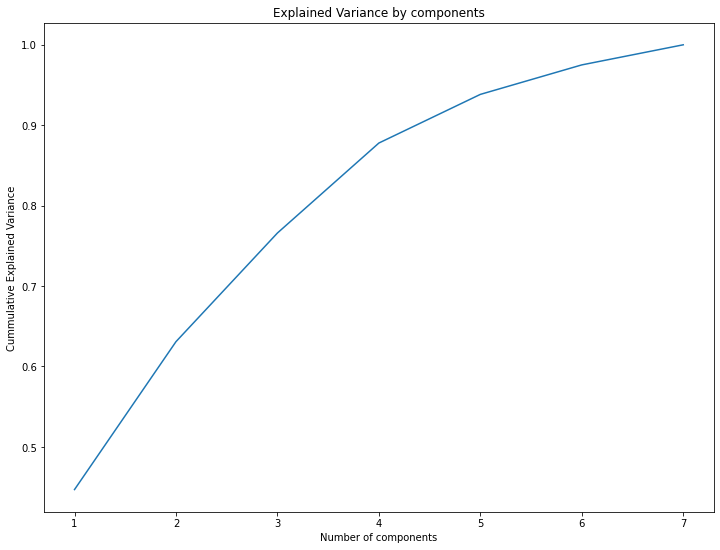

In [14]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Explained Variance by components')

In [15]:
pca=PCA(n_components=3)

In [16]:
pca.fit(clust_trans_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[ 0.40961065,  0.45634327,  0.49482273,  0.24405028,  0.23567949,
         0.5120542 ,  0.04260917],
       [-0.33081311, -0.06829381, -0.20579693,  0.51113728,  0.62151705,
        -0.04198378,  0.44072538],
       [ 0.29520329, -0.12177854,  0.11031859, -0.01854138, -0.40814155,
        -0.10751738,  0.84105382]])

In [18]:
df_pca_comp=pd.DataFrame(pca.components_,columns=df_clust.columns,index=['component 1','component 2','component 3'])

In [19]:
df_pca_comp

,budget,popularity,revenue,runtime,vote_average,vote_count,release_quarter
component 1,0.409611,0.456343,0.494823,0.244050,0.235679,0.512054,0.042609
component 2,-0.330813,-0.068294,-0.205797,0.511137,0.621517,-0.041984,0.440725
component 3,0.295203,-0.121779,0.110319,-0.018541,-0.408142,-0.107517,0.841054


### THIS HEATMAP SHOWS THE CORRELATION BETWEEN THE PCA COMPONENTS AND ACTUAL COMPONENTS

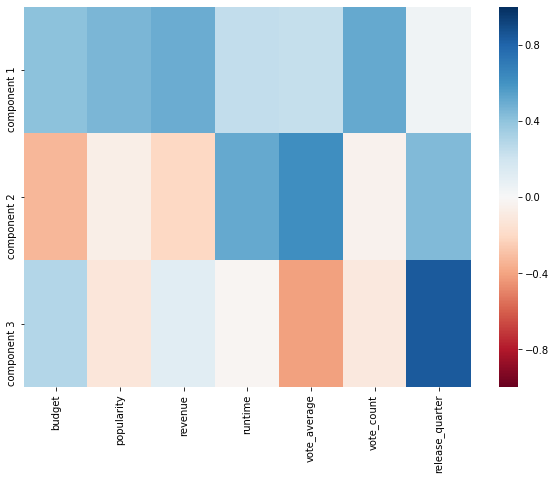

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df_pca_comp,vmin=-1,vmax=1,cmap='RdBu')

In [21]:
scores_pca=pca.transform(clust_trans_scaled)

## HIERACHIAL CLUSTERING

In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage 

In [23]:
hier_clust = linkage(scores_pca, method='ward')

### the number of clusters will be the number of vertical lines intersected by the threshold(distance selected)
* distance of 80 would mean 2 clusters
* distance of 50 would mean 4 clusters
* etc

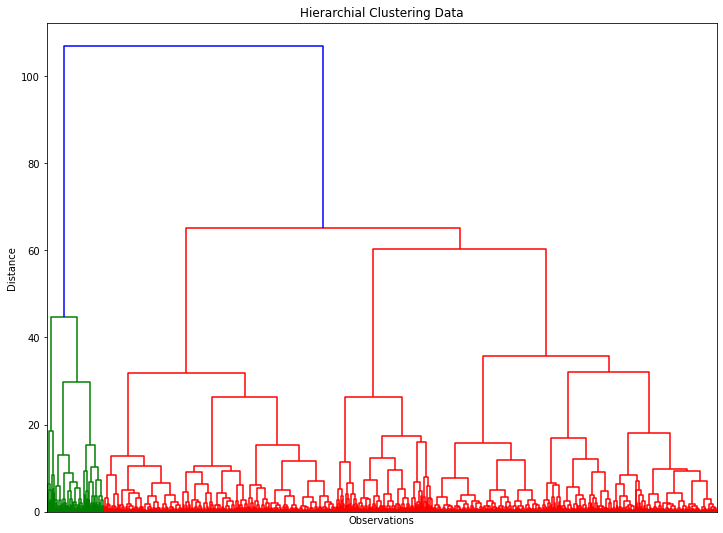

In [24]:
plt.figure(figsize=(12,9))
plt.title('Hierarchial Clustering Data')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,show_leaf_counts=False,no_labels=True,truncate_mode='level')
plt.show()

In [25]:
from sklearn.cluster import KMeans 

### ELBOW METHOD FOR CHOOSING OPTIMAL CLUSTERS

In [53]:
wcss =[]
for i in range(1,4):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
        kmeans.fit(scores_pca)
        wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

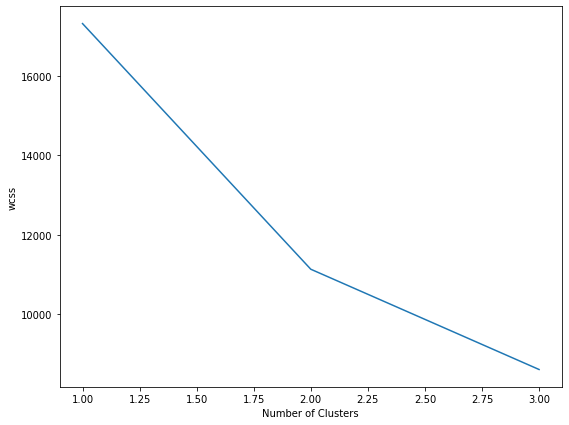

In [55]:
plt.figure(figsize=(9,7))
plt.plot(range(1,4),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

## KMEANS CLUSTERING

In [28]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=101)

In [29]:
kmeans.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [30]:
df_segm_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment KMeans pca']=kmeans.labels_

### THE DATAFRAME BELOW SHOWS THE ORIGINAL COMPONENTS WITH THE PCA COMPONENTS SIDE BY SIDE

In [31]:
df_segm_pca_kmeans.sample(2)

,cast,crew,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,release_year,release_month,release_quarter,Component 1,Component 2,Component 3,Segment KMeans pca
2656,"['John C. Reilly', 'Tilda Swinton', 'Ezra Mill...",['Lynne Ramsay'],7000000,"['Drama', 'Thriller']","['suburb', 'violence', 'killing spree', 'priso...",en,We Need to Talk About Kevin,21.276864,"['BBC Films', 'Oscilloscope Laboratories']","['United Kingdom', 'United States of America']",6038942,112.0,Released,7.4,677,2011,9,3,-0.499817,1.357058,-0.470265,1
2328,"['Eddie Murphy', 'Charles Dance', 'Charlotte L...",['Michael Ritchie'],25000000,"['Action', 'Adventure', 'Comedy']","['monk', 'social worker', 'wretch', 'tibet', '...",en,The Golden Child,15.262130,['Paramount Pictures'],['United States of America'],79817939,94.0,Released,5.6,304,1986,12,4,-1.004660,-0.150771,1.370712,1


In [32]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment KMeans pca']).mean()

In [33]:
df_segm_pca_kmeans_freq

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_quarter,Component 1,Component 2,Component 3
Segment KMeans pca,,,,,,,,,,,,
0,1.180459e+08,86.548582,4.969848e+08,125.216802,6.864770,3925.959350,2006.707317,7.184282,2.674797,3.826019,-0.422687,0.079315
1,3.066932e+07,21.613061,7.276437e+07,108.854545,6.237692,596.846853,2001.031818,6.960839,2.627622,-0.493637,0.054536,-0.010233


### CONNOTATIONS
* P.I MEANS PREDOMINANTLY INDEPENDENT
* P.B MEANS PREDOMINANTLY BIG STUDIOS

In [34]:
df_segm_pca_kmeans_freq['N Obv']=df_segm_pca_kmeans[['Segment KMeans pca','budget']].groupby(['Segment KMeans pca']).count()
df_segm_pca_kmeans_freq['Prp_osv']=df_segm_pca_kmeans_freq['N Obv']/df_segm_pca_kmeans_freq['N Obv'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Big Studios',1:'Independents'})

In [35]:
df_segm_pca_kmeans_freq

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_quarter,Component 1,Component 2,Component 3,N Obv,Prp_osv
Segment KMeans pca,,,,,,,,,,,,,,
Big Studios,1.180459e+08,86.548582,4.969848e+08,125.216802,6.864770,3925.959350,2006.707317,7.184282,2.674797,3.826019,-0.422687,0.079315,369,0.114277
Independents,3.066932e+07,21.613061,7.276437e+07,108.854545,6.237692,596.846853,2001.031818,6.960839,2.627622,-0.493637,0.054536,-0.010233,2860,0.885723


In [36]:
df_segm_pca_kmeans['Legend']=df_segm_pca_kmeans['Segment KMeans pca'].map({0:'Big Studios',1:'Independents'})

### CLUSTER VISUALS
####  TO UNDERSTAND WHAT THE COMPONENTS DEPICT PLEASE REFER TO HEATMAP

* NOTICE THE NATURAL DIVIDE BETWEEN THE BIG STUDIOS AND INDEPENDENT 

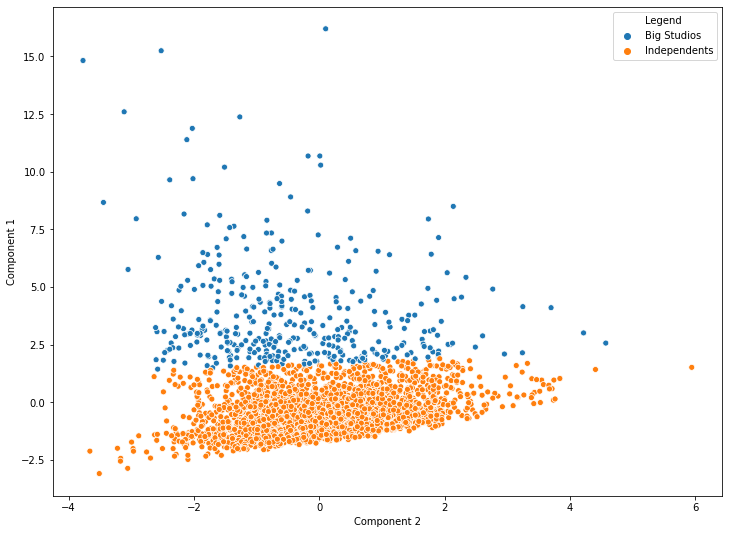

In [37]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_segm_pca_kmeans['Component 2'],df_segm_pca_kmeans['Component 1'],hue=df_segm_pca_kmeans['Legend'])

### NOTICE SAME 2D PLANE DIVIDE IN THE SECOND VISUAL

In [ ]:
for index in centroid.iterrow():
    if row_c[:30], index_i[:10]

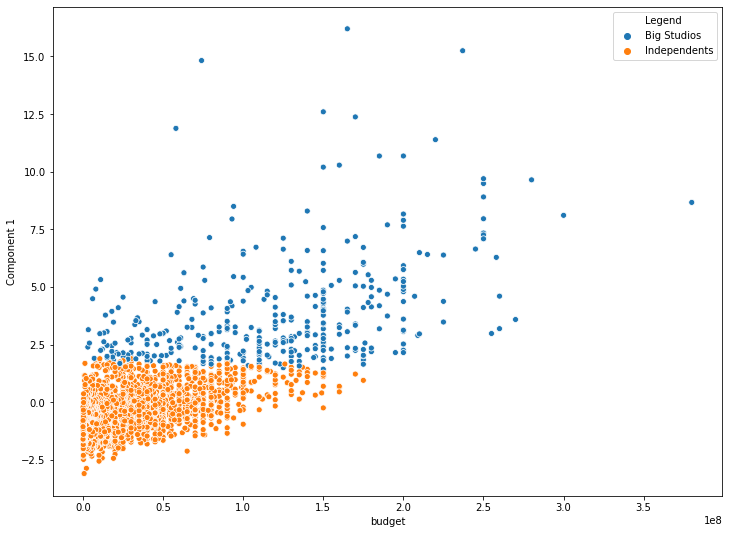

In [49]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_segm_pca_kmeans['budget'],df_segm_pca_kmeans['Component 1'],hue=df_segm_pca_kmeans['Legend'])

## Conclusion
* There is a natural divide as seen from the two distinct clusters formed
* Variations are present in both clusters but that is to be expected as some independent studios do well while some big studios end up flopping in the market